# Simple Data Processing with *Stanford Open Policing Project* Data

This notebook shows simple data processing and plotting, using [The Stanford Open Policing Project](https://openpolicing.stanford.edu/)'s Oakland dataset. A description of the data is [here](https://openpolicing.stanford.edu/data).

Technically, this notebook covers:

- What is a CSV file?
- How do we read a CSV file in Python using `csv.reader()`?
- How might we parse data using tools we already know, like `for` loops?
- How might we display data visually using `matplotlib.pyplot`?

## What is a CSV?

'CSV' is a file format. It stands for *comma-separated values*. As the full name suggests, a csv file contains a set of values; each value is separated by a comma.

For eample, this CSV excerpt has three columns (`date,time,location`) and three rows of data.

```
date,time,location
2013-04-01,20:52:00,700 Blk Of Center St
2013-04-01,15:55:00,73R D AV&INTERNATIONAL BLVD
NA,01:33:00,E. 28th St. & Park BLVD
```

CSV is a very common data format, and Python is a great tool for processing CSV data at a large scale or with a lot of complexity. In fact, Python comes with a library called `csv` for exactly these purposes.

In [72]:
# Import a library called csv.
# (https://docs.python.org/3/library/csv.html)
# We will use a module called csv.reader() which will help
# us parse csv data.
import csv

## How do we read a CSV file in Python using` csv.reader()`?

In the following cell, we preview the data in a CSV called 'ca_oakland_2020_04_01.csv_SHORT'. Not that this CSV file is a separate file in the same directory as this notebook. It is a shortened version of the original dataset.

In [24]:
# Open the csv file, set the mode to 'r' (read mode),
# and call the file 'infile' for short.
with open('ca_oakland_2020_04_01_SHORT.csv', mode='r') as infile:
    # Create a reader object based on the file's contents
    reader = csv.reader(infile)
    # For every row in our reader object
    for row in reader:
        # Print the row
        print(row)
        # Toggle the following line to view either just
        # the first row (the column headings), or the
        # whole dataset.
        break

['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'beat', 'subject_age', 'subject_race', 'subject_sex', 'officer_assignment', 'type', 'arrest_made', 'citation_issued', 'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs', 'contraband_weapons', 'search_conducted', 'search_basis', 'reason_for_stop', 'use_of_force_description', 'raw_subject_sdrace', 'raw_subject_resultofencounter', 'raw_subject_searchconducted', 'raw_subject_typeofsearch', 'raw_subject_resultofsearch']


## How might we parse data using tools we already know?

In the following cell, we extract all latitude and longitude infromation from the CSV file, and we store them in a way that is compatible with the next step (plot them).

In [69]:
# Create an empty list to store all lat and long separately.
latitudes = []
longitudes = []

# Open the csv file, set the mode to 'r' (read mode),
# and call the file 'infile' for short.
with open('ca_oakland_2020_04_01_SHORT.csv', mode='r') as infile:
    # Create a reader object based on the file's contents
    reader = csv.reader(infile)
    # Skip the header line
    next(reader)
    # For every row in our reader object
    for row in reader:
        # If both a lat and a long are available
        if row[4] != 'NA' and row[4] != 'NA':
            # Add (append) each lat and long to the appropriate list.
            latitudes.append(float(row[4]))
            longitudes.append(float(row[5]))

# Preview the first ten items of each list, as a sanity check.
print(latitudes[:10])
print(longitudes[:10])

[37.803084000000005, 37.7675677, 37.820598499999996, 37.8212456, 37.802937299999996, 37.8121989, 37.8157596, 37.73451, 37.759561, 37.8229491]
[-122.2372469, -122.19682040000002, -122.27073429999999, -122.2764876, -122.2717384, -122.27638789999999, -122.2850803, -122.19717, -122.186857, -122.25576629999999]


## How might we display data visually using `matplotlib.pyplot`?

In the following cell, we use our latitude and longitude information, and plot stop incidents visually using a library called [MatPlotLib](https://matplotlib.org/).

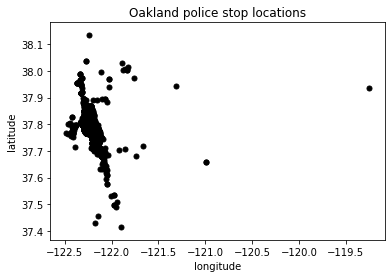

In [74]:
# Import a module called pyplot from the matplotlib library.
# Call the module plt for short.
# (https://matplotlib.org/)
from matplotlib import pyplot as plt

# Create a scatter plot using longitude items as x axis values
# and latitude items as y axis values.
plt.scatter(longitudes,
            latitudes,
            color='k',
            s=25,
            marker='o')

# Add some plot labels
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Oakland police stop locations')
plt.show()

## Summary & resources for more

This is not particularly insightful in itself, but it shows the mechanics of:
 
- reading a common data format (csv) using `csv.reader()`
- parsing rows of information using tools we've already learned like `for` loops
- displaying data visually using `matplotlib.pyplot`

There is a lot more data in the original CSV (as well as other cities' data to explore), and now you have some tools to begin exploring and visualizing it computationally, and gaining new insights from it.

**For continued work with data processing and visualization, we recommend checking out this great resource of [Data-Driven Efforts to Reduce Racial Inequality](https://medium.com/data-stewards-network/ongoing-data-driven-efforts-to-address-racial-inequality-49e40ee05fee), compiled by [The Governance Lab @ NYU](http://www.thegovlab.org/). It is also worth checking out the [NumPy library](https://numpy.org/), often used together with [MatPlotLib](https://matplotlib.org/).**